# Introduction to Neural Networks

Neural Networks (NNs) are used to solve a lot of challening artifical intelligence problems, and are basic building blocks of Deep Learning. They are often known to outperform other traditional ML models. 

In the basic structure of a NN there are artifical neurons that recieve and process input data. This data is then passed from the input layer to the hidden layes and finally to the output layers. A NN starts when the input data is fed into it, and processed via the layers to provide the desired output. 

## The various parts of a Neural Network

A Neural Networks has various parts that work together to form the entire network. The image below will help you visualize the different parts of a NN. They are as follows:

* **Input Layer**: The input layer is the first layer through which the output is fed into the neural network. From here it is processed and passed onto the hidden layers. 

* **Hidden Layer**: A hidden layer is any layer which is in between the input and and output layer. There can be one or many hidden layers, the more there are, the more complex the model becomes and the more computations it requires. 

* **Output Layer**: The output layer is the one that outputs the final "answer: of the NN based on the given input. In the training phase, this output is compared to the actual output of the data, and the network is updated accordingly.

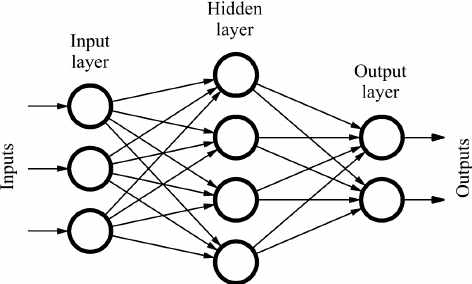


## The structure of a single neuron
So now that we know the general structure of the Neural Network, let us zoom into one single neuron (one circle in the picture above) and see how that functions in the network structure. 


* **Inputs**: The input to a neuron, is not the same thing as the the input to our entire network. The input to a single neuron refers to the outputs of the neurons in the layer before itself, that this neuron recieves. In the input layer, this would refer to the input itself. In a hidden layer, it would refer to the outputs this neuron recives from a neuron in the input layer. 
* **Weights**: The weights refer to a set of constants that is multiplied by the inputs just discussed. These weights are the main distingushing factor of a neuron, as these are what are updated at every backward pass of the NN. 
* **Bias**: This bias is once again another set of constants that is added to the the weights multipled by the input, so an equation like this: *(weights * inputs) + biases*. These biases are also updated at every backward pass of the NN. 
* **Activation Function**: The activation function determines whether this neuron is ON or OFF. This is a function that takes *(weights * inputs) + biases* and determines based on this whether the neuron is active or not. 
* **Output**: Ths final part is the output. This is the output of the neuron, that is passed as input to the neurons in the next layer after it. The whole cycle continues of every neuron in the network.

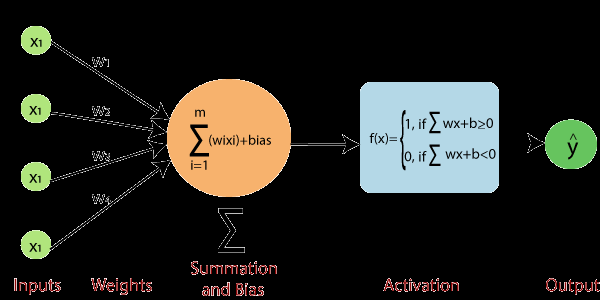

## So how does learning actually take place in a Neural Network?

Given the assumption that we have labelled data (inputs corresponding to its correct output), the NN is trained to predict the desired result after bring trained on how to interpret the data. Here the input is fed to the network through the input layer and an output is produced. The output is then compared to the desired output (given but the training data) and depending on how different they are, the weights of the neurons in the network are updated to bring the produced output closer to the actual one. This is done for every training data point, hence in most cases, the more training data you have, the better the NN will perform.  

# Many types of Networks

So now that we know some things about Neural Networks, it is important to know that they refer to a general model of networks. Many parameters can be tweaked and from this many inherently different networks emerge. 

In this notebook we will focus on one particualr type called the Multi-layer Perceptron. This type of NN can learn a non-linear function approximator for either classification or regression. There can be one or more non-linear hidden layers between the input and output layers. After constructing the model, we will look at advantges and the disadvantages of using a MLP. 

### Dataset

The dataset we will be using is once again the Iris dataset, which is a benchmark in the AI community. A more detailed description and analysis of this can be found in the clustering notebook, that you completed earlier. 

In [ ]:
# Necessary imports, simply execute this block
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Loading, Splitting and Scaling the data

In this code block you will load the iris dataset, split it into training and testing sets, and finally scale in input from the Neural Network!

In [ ]:
# Load the iris dataset
iris = load_iris()

In [ ]:
# Split the data into training and testing data
datasets = train_test_split(iris.data, iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [ ]:
# Scaling the data using a standard scalar.
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[ 2.21646572  1.71453491  1.64964219  1.3139673 ]
 [ 0.99583292  0.12314339  1.01957052  1.58212389]
 [-1.07924283  0.80516833 -1.32887843 -1.36759862]]


### Creating the MLP

Now that we have our data, let us fit the MLP to the data and train the network!

In [ ]:
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

## How Good does the NN perform?

Now that we have trained the Neural Network, we want to see how well it actually performs both on the training set and on the testing set. 

A simple metric we can use in this case is the accuracy score, which put simply is the number of correctly classified data points over all the data points. This provides a naive yet intuitive metric for our purposes. Ideally the accuracy on the training data should be higher that the testing data since our NN has already seen this data in the training phase of the network.

Finally the sklearn library also provides us with a classification report on for the NN for a given test set. This can be used to see various other scores apart from the accuracy. We will see how to produce this report, but understanding all the metrics are out of scope for this notebook. 

In [ ]:
# Genrate the predictions on the training data
predictions_train = mlp.predict(train_data)

In [ ]:
# Print the accuracy on the training data
print(accuracy_score(predictions_train, train_labels))

0.9833333333333333


In [ ]:
# Generate the predictions on the testing data
predictions_test = mlp.predict(test_data)

In [ ]:
# Print the accuracy on the training data
print(accuracy_score(predictions_test, test_labels))

0.9666666666666667


In [ ]:
# Produce an dprint the classification report on the test set
print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Advantages and Disadvantages

From this notebook we hoped that you gained a slight insight into the world of Neural Networks. From a distance it might seem like NNs can solve any machine learning problem due to their high flexibility, but there are some disadvantages to solve all problems using an this approach. 

Some **Advantages** include:

* Continuous Learning: An NN can learn and improve its results continously, by adding to the training set. It does not get tired and with more input it can get better and better.

* Fault tolerant: Due to the NN being able to store information throughout the network, corruption or faultyness of one or more neurons does not cause the entire system to fail.

* Complex Models: An NN, given enough hidden layers and data points has the ability to learn some of the most complex problems, which other linear regressors, or classifiers might fall short of. 

Some **disadvantages** include:

* Unexplained functioning of the the networks: Although the NN does give a solution, often times it is not interpretable. It does not give a clude as to why and how the particualr solution produced works. 

* Data dependency: NNs are highly dependent on the amount of data the user has. The more data used during training the more accurate the results are. For example, thousands if not millions of labeled examples are needed. Also if the data is faulty, the results will be faulty which can pose serious threats. 